In [1]:
import config as CONFIG

from csbdeep.io import load_training_data
from csbdeep.models import IsotropicCARE, Config
from csbdeep.utils import axes_dict, plot_some, plot_history

from matplotlib import pyplot as plt
import numpy as np

In [2]:
(X,Y), (X_val,Y_val), axes = load_training_data(CONFIG.TRAIN_DATASET_PATH, validation_split=0.1, axes='SCYX', verbose=True)

number of training images:	 22852
number of validation images:	 2539
image size (2D):		 (128, 128)
axes:				 SYXC
channels in / out:		 2 / 2


In [3]:
FX = IsotropicCARE(config=None, name='FX', basedir=CONFIG.CHECKPOINT_PATH)

Loading network weights from 'FX.hdf5'.


In [4]:
DX = IsotropicCARE(config=None, name='DX', basedir=CONFIG.CHECKPOINT_PATH)

Loading network weights from 'DX.hdf5'.


In [5]:
x = X_val[0:1]
y = Y_val[0:1]

print(x.shape, y.shape)

(1, 128, 128, 2) (1, 128, 128, 2)


In [6]:
y_est = FX.keras_model.predict(x)
x_back = DX.keras_model.predict(y)
residual = x - x_back

d:\anaconda3\envs\care\lib\site-packages\csbdeep\utils\plot_utils.py:55: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return _plot_some(arr=arr, title_list=title_list, pmin=pmin, pmax=pmax, cmap=cmap, **imshow_kwargs)


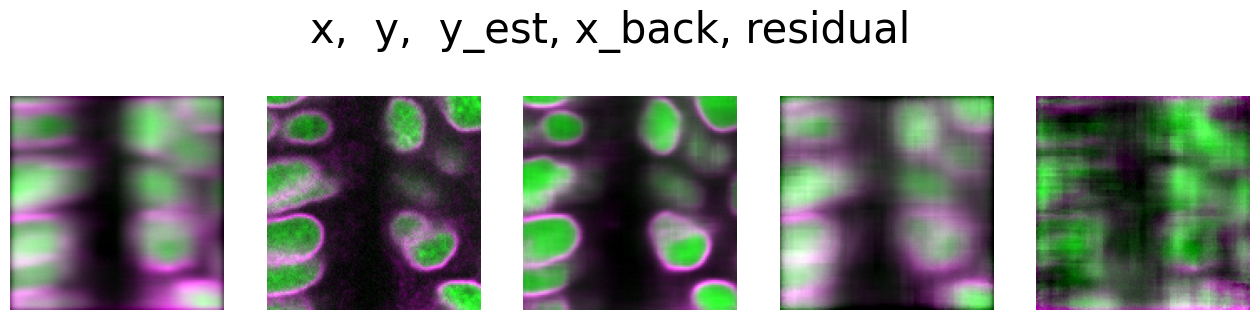

In [7]:
plt.figure(figsize=(16,4))
plt.suptitle('x,  y,  y_est, x_back, residual', fontsize=30)
plot_some(np.squeeze([x, y, y_est, x_back, residual], axis=1))
plt.show()